# Multi-Class Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Loading Iris Dataset

In [ ]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Task 1: Create predictors and label**

In [ ]:
# Write Code Here
X = iris.drop(['Id','Species'], axis=1)
Y = iris[['Species']]

**Task 2: Split the data with test size 30 and random state 25**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Write Code Here
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=25)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


**Task 3: Define the model for Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Write the code here
model = RandomForestClassifier(max_depth=3,random_state=25)

**Task 4: Train the model**

In [ ]:
# Write the code here
model.fit(xtrain, ytrain)

C:\Users\Fatima Bukhari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Fatima Bukhari\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

**Task 5: Get the predictions**

In [ ]:
# Write the code here
pred = model.predict(xtest)
pred_prb=model.predict_proba(xtest)

**Task 6: Find the accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Write the code here
accuracy = accuracy_score(ytest,pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.9555555555555556


**Task 7: Print Classification Report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Write Code here
print(classification_report(ytest,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Creating confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(ytest, pred) 

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

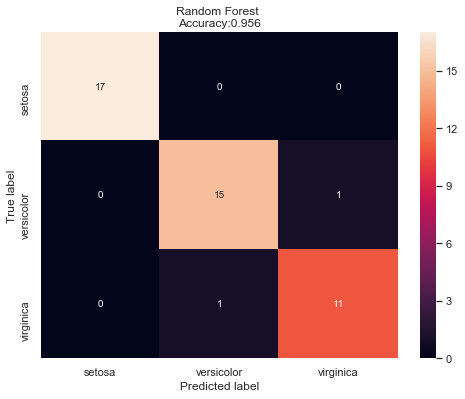

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()